In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data from Keras

In [4]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) =mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
X_train.shape[0]

60000

In [8]:
np.unique(y_train) # numbers of classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# Exploring Data

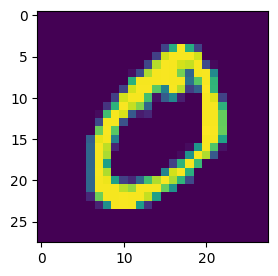

In [12]:
plt.figure(figsize=(3,3))
plt.imshow(X_train[1,:,:])
plt.show()

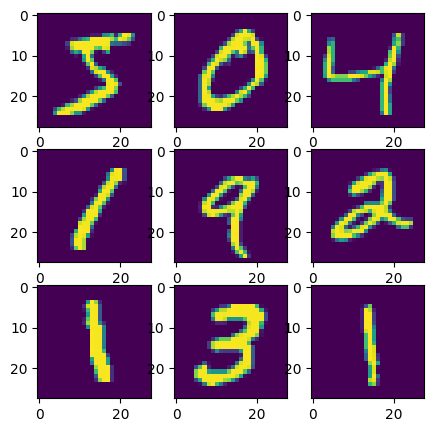

In [15]:
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3, i+1)
  plt.imshow(X_train[i,:,:])


# Preparing Data

In [16]:
X_train.shape #before reshape

(60000, 28, 28)

In [17]:
X_train = X_train.reshape(60000, 28, 28,1) # After reshaping
X_train = X_train.astype('float32')/255 # Normalizing

In [19]:
X_test.shape #before reshape

(10000, 28, 28)

In [21]:
X_test = X_test.reshape(10000, 28, 28,1) # After reshaping
X_test = X_test.astype('float32')/255 # Normalizing

The to_categorical function from Keras is used to convert integer labels into one-hot encoded vectors. One-hot encoding is a technique commonly used in machine learning and deep learning tasks, especially for multi-class classification problems.
One-hot encoding is useful because it allows machine learning models to easily represent categorical data numerically. It ensures that the model doesn't assume any ordinal relationship between the different categories and treats them as distinct and equal. This encoding is often used as a preprocessing step before training models, especially when working with categorical labels in classification tasks.

In [22]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Using Convolutional Neural Network (CNN)

Model buliding

In [23]:
from keras import layers
from keras import models

In [26]:
cnn = models.Sequential()
# feature extraction
cnn.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (28,28,1)))
cnn.add(layers.MaxPooling2D((2,2)))

cnn.add(layers.Conv2D(64,(3,3), activation='relu'))
cnn.add(layers.MaxPooling2D((2,2)))

cnn.add(layers.Conv2D(64, (3,3), activation='relu'))

#fully-connected layer
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))

In [27]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [28]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

## Model Training

In [29]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 74s 76ms/step - loss: 0.1806 - accuracy: 0.9435
Epoch 2/5
938/938 [==============================] - 79s 84ms/step - loss: 0.0489 - accuracy: 0.9850
Epoch 3/5
938/938 [==============================] - 55s 59ms/step - loss: 0.0325 - accuracy: 0.9899
Epoch 4/5
938/938 [==============================] - 57s 61ms/step - loss: 0.0251 - accuracy: 0.9921
Epoch 5/5
938/938 [==============================] - 55s 58ms/step - loss: 0.0190 - accuracy: 0.9941


## Model Evaluation


In [32]:
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(round(test_acc,2))
print(round(test_loss,2))

313/313 [==============================] - 3s 9ms/step - loss: 0.0507 - accuracy: 0.9868
0.99
0.05


Model Prediction

In [33]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 4s 10ms/step


In [34]:
y_pred = np.argmax(np.round(y_pred), axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [35]:
y_test = np.argmax(np.round(y_test),axis=1)
y_test

array([7, 2, 1, ..., 4, 5, 6])

In [36]:
for i in range(0,10):
  print(y_pred[i],y_test[i])

7 7
2 2
1 1
0 0
4 4
1 1
4 4
9 9
6 5
9 9


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Confusion Matrix

In [38]:
print(confusion_matrix(y_test, y_pred))

[[ 973    3    0    0    1    0    0    1    0    2]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   3    6 1015    0    2    0    0    4    2    0]
 [   2    2    2  992    0    5    0    1    6    0]
 [   0    1    0    0  980    0    0    0    0    1]
 [   8    1    0    5    0  848   19    1    1    9]
 [   3    5    0    0    6    0  943    0    1    0]
 [   0   13    1    0    1    0    0 1012    0    1]
 [   2    2    0    0    0    0    0    1  969    0]
 [   1    2    0    0    4    0    0    2    3  997]]


Classification Report

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      1.00      0.98      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.95      0.97       892
           6       0.98      0.98      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

